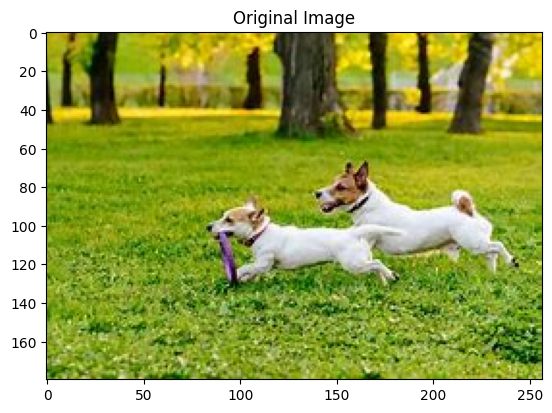


Rank r = 5:
Average RMSE: 9.784488447293306
Average PSNR: 28.553337897670204 dB


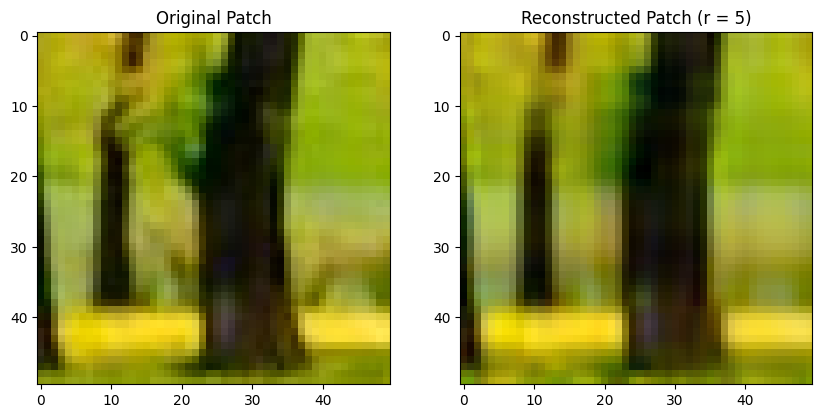


Rank r = 10:
Average RMSE: 4.541109847706447
Average PSNR: 35.037091743334365 dB


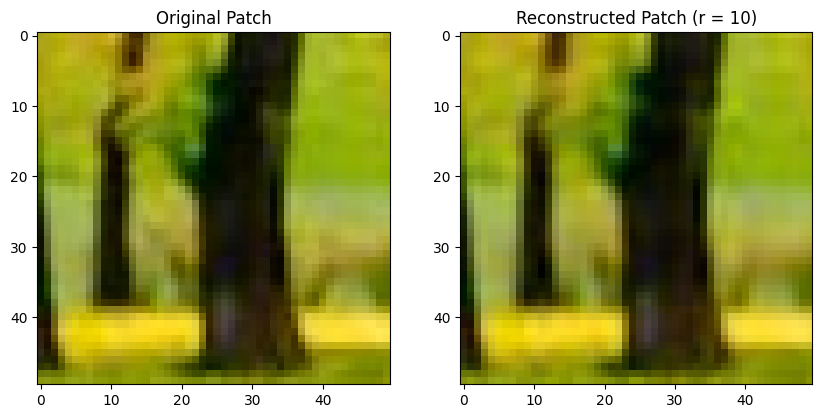


Rank r = 25:
Average RMSE: 0.9587491700070799
Average PSNR: 48.49670372601091 dB


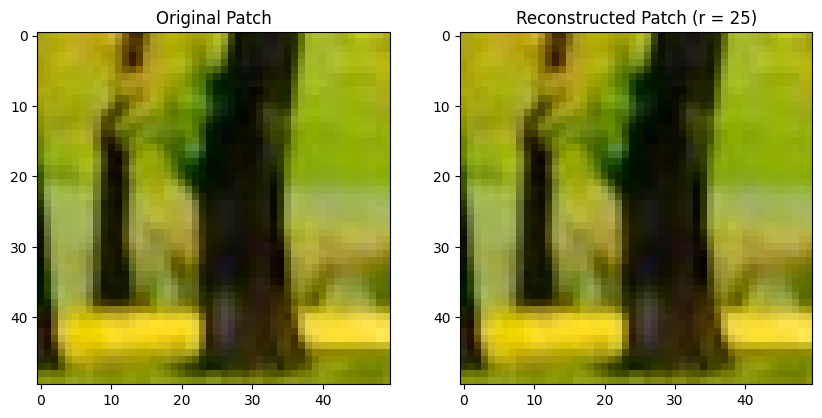


Rank r = 50:
Average RMSE: 0.6779143448008353
Average PSNR: 51.52451361735587 dB


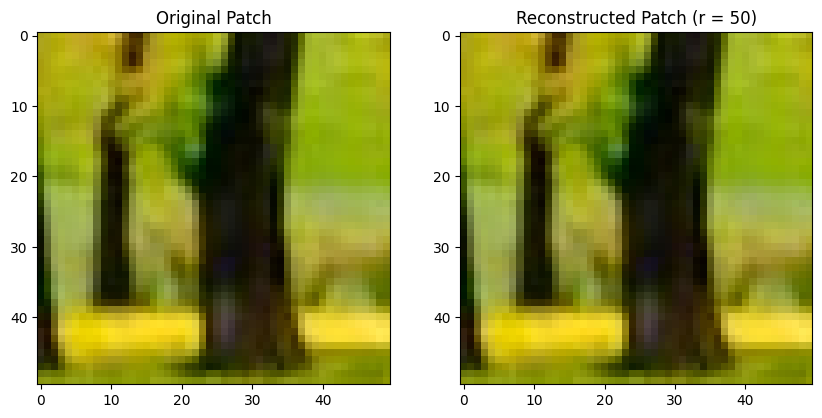

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from PIL import Image

# Function to compute PSNR
def compute_psnr(original, reconstructed, max_pixel=255.0):
    mse = mean_squared_error(original, reconstructed)
    if mse == 0:
        return float('inf')  # Perfect reconstruction
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# Function for Gradient Descent based matrix factorization
def gradient_descent_factorization(X, r, learning_rate=0.001, iterations=10000):
    N = X.shape[0]
    U = np.random.rand(N, r)  # Initialize U randomly
    V = np.random.rand(r, N)  # Initialize V randomly

    for _ in range(iterations):
        # Compute the gradient for U and V
        X_approx = np.dot(U, V)
        error = X_approx - X

        # Update U and V using gradient descent
        U_gradient = np.dot(error, V.T)
        V_gradient = np.dot(U.T, error)

        U -= learning_rate * U_gradient
        V -= learning_rate * V_gradient

    return U, V

# Load an RGB image (replace with your image path)
image_path = r'C:\Users\chaud\OneDrive\Desktop\image\OIP.jpeg'  # Replace with your image path
image = Image.open(image_path).convert('RGB')  # Load image in RGB format
image_np = np.array(image).astype(np.float64)  # Convert to numpy array

# Display the original image
plt.imshow(image_np.astype(np.uint8))
plt.title("Original Image")
plt.show()

# Get the patch of size (50x50) from the image
N = 50  # Patch size
patch = image_np[:N, :N, :]  # Extract a 50x50 patch from the top-left corner

# Test different values of rank r
r_values = [5, 10, 25, 50]
learning_rate = 0.0001
iterations = 5000

# Iterate over each value of r
for r in r_values:
    print(f"\nRank r = {r}:")

    reconstructed_patch = np.zeros_like(patch)

    # Apply matrix factorization via gradient descent to each channel (R, G, B)
    for i in range(3):  # Loop over the RGB channels
        U, V = gradient_descent_factorization(patch[:, :, i], r, learning_rate, iterations)
        reconstructed_patch[:, :, i] = np.dot(U, V)

    # Clip values to ensure they're within the valid pixel range [0, 255]
    reconstructed_patch = np.clip(reconstructed_patch, 0, 255)

    # Convert to uint8 for proper display
    reconstructed_patch = reconstructed_patch.astype(np.uint8)

    # Compute RMSE for each channel and average them
    rmse_r = np.sqrt(mean_squared_error(patch[:, :, 0], reconstructed_patch[:, :, 0]))
    rmse_g = np.sqrt(mean_squared_error(patch[:, :, 1], reconstructed_patch[:, :, 1]))
    rmse_b = np.sqrt(mean_squared_error(patch[:, :, 2], reconstructed_patch[:, :, 2]))
    rmse_avg = (rmse_r + rmse_g + rmse_b) / 3

    # Compute PSNR for each channel and average them
    psnr_r = compute_psnr(patch[:, :, 0], reconstructed_patch[:, :, 0])
    psnr_g = compute_psnr(patch[:, :, 1], reconstructed_patch[:, :, 1])
    psnr_b = compute_psnr(patch[:, :, 2], reconstructed_patch[:, :, 2])
    psnr_avg = (psnr_r + psnr_g + psnr_b) / 3

    # Display RMSE and PSNR
    print(f"Average RMSE: {rmse_avg}")
    print(f"Average PSNR: {psnr_avg} dB")

    # Plot original and reconstructed patches
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(patch.astype(np.uint8))
    plt.title(f"Original Patch")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_patch)
    plt.title(f"Reconstructed Patch (r = {r})")

    plt.show()
